In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head(4)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910


In [3]:
df = df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" }) 
df.head(2)

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635


In [4]:
#convert column to datetime
df["ds"] = pd.to_datetime(df["ds"])

In [5]:
dfe = df[['ds','y']]
dfe = pd.DataFrame(dfe)
dfe.set_index('ds',inplace=True)
dfe.head(3)

,y
ds,
2010-09-01 00:00:00,23.710
2010-09-01 01:00:00,22.635
2010-09-01 02:00:00,22.565


Text(0, 0.5, 'ElecPrice')

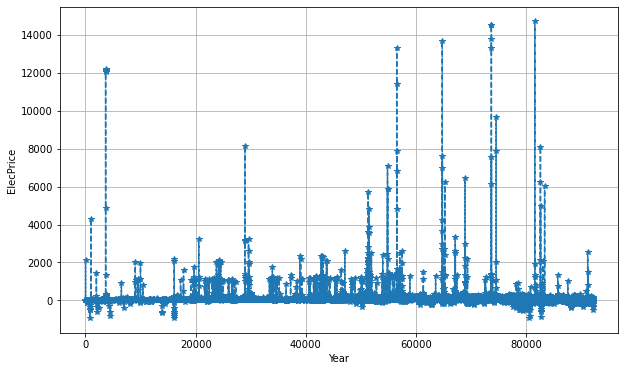

In [6]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.y, '--' , marker= '*' )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'ElecPrice' )

Text(0, 0.5, 'ElecPrice')

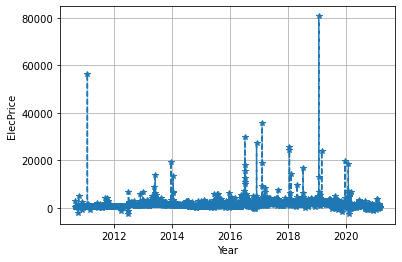

In [7]:
#Downsample to DAILY data points
df_daily = dfe.resample('D').sum()
plt.plot(df_daily.index, df_daily.y, '--' , marker= '*' )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'ElecPrice' )

In [8]:
print(dfe.head(2))
print(df_daily.head(2))

                          y
ds                         
2010-09-01 00:00:00  23.710
2010-09-01 01:00:00  22.635
                  y
ds                 
2010-09-01  2751.70
2010-09-02   570.81


In [9]:
df_daily.reset_index(inplace=True)

df_daily

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


In [10]:
train_data = df_daily[0:2757]
train_data

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
2752,2018-03-15,2717.340
2753,2018-03-16,2277.335
2754,2018-03-17,1718.385
2755,2018-03-18,1088.015


In [11]:
test_data = df_daily.loc[::-1].reset_index(drop=True)
test_data = test_data[0:2757]

test_data

,ds,y
0,2021-02-28,-98.985
1,2021-02-27,488.980
2,2021-02-26,1445.495
3,2021-02-25,577.515
4,2021-02-24,634.770
...,...,...
2752,2013-08-17,1320.565
2753,2013-08-16,1707.565
2754,2013-08-15,2713.205
2755,2013-08-14,1460.680


In [12]:
ds_test = test_data['ds']
ds_test = pd.DataFrame(ds_test)
y_test = test_data['y']
y_test = pd.DataFrame(y_test)

In [13]:
ds_test

,ds
0,2021-02-28
1,2021-02-27
2,2021-02-26
3,2021-02-25
4,2021-02-24
...,...
2752,2013-08-17
2753,2013-08-16
2754,2013-08-15
2755,2013-08-14


In [14]:
y_test

,y
0,-98.985
1,488.980
2,1445.495
3,577.515
4,634.770
...,...
2752,1320.565
2753,1707.565
2754,2713.205
2755,1460.680


In [15]:
model = Prophet() 
model.fit(train_data)

17:18:44 - cmdstanpy - INFO - Chain [1] start processing
17:18:47 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast = model.predict(ds_test)
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2013-08-13,1613.221502,-835.327528,4050.779939,1729.228121,1729.228121,1729.228121
1,2013-08-14,1785.576458,-398.046642,4261.834733,1728.114326,1728.114326,1728.114326
2,2013-08-15,1906.345527,-593.783563,4281.758108,1727.000531,1727.000531,1727.000531
3,2013-08-16,1722.063051,-576.899649,3997.432945,1725.886736,1725.886736,1725.886736
4,2013-08-17,1421.775721,-801.939579,3929.094662,1724.772941,1724.772941,1724.772941
...,...,...,...,...,...,...,...
2752,2021-02-24,3440.038377,669.802275,6348.055164,3530.227313,1731.947394,5368.731279
2753,2021-02-25,3506.930487,451.642715,6341.617401,3531.017654,1734.496418,5372.276128
2754,2021-02-26,3273.761335,249.257462,6235.566443,3531.807995,1734.087869,5377.736361
2755,2021-02-27,2930.441710,-295.551998,5929.511350,3532.598336,1732.081229,5383.265436


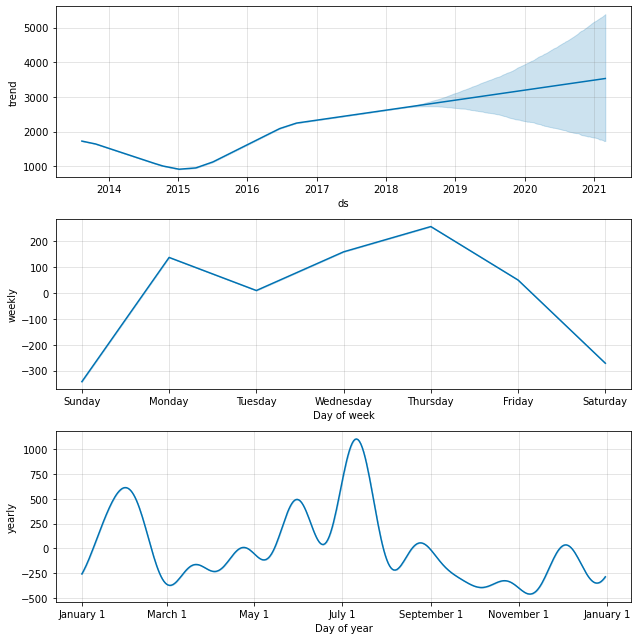

In [17]:
model.plot_components(forecast)
plt.show()

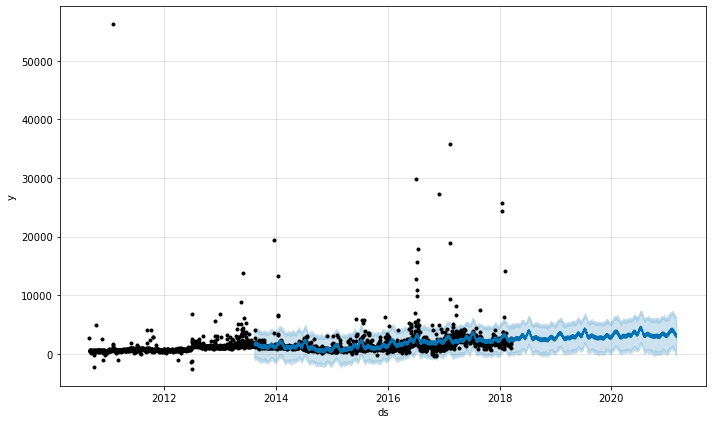

In [18]:
model.plot(forecast) 
plt.show()

In [19]:
pred = forecast['yhat']
pred = pd.DataFrame(pred)
pred

,yhat
0,1613.221502
1,1785.576458
2,1906.345527
3,1722.063051
4,1421.775721
...,...
2752,3440.038377
2753,3506.930487
2754,3273.761335
2755,2930.441710


In [20]:
y_test = y_test.loc[::-1].reset_index(drop=True)
y_test = pd.DataFrame(y_test)
y_test

,y
0,1518.215
1,1460.680
2,2713.205
3,1707.565
4,1320.565
...,...
2752,634.770
2753,577.515
2754,1445.495
2755,488.980


In [21]:
result_df = pd.concat([y_test,pred],axis=1)
result_df

,y,yhat
0,1518.215,1613.221502
1,1460.680,1785.576458
2,2713.205,1906.345527
3,1707.565,1722.063051
4,1320.565,1421.775721
...,...,...
2752,634.770,3440.038377
2753,577.515,3506.930487
2754,1445.495,3273.761335
2755,488.980,2930.441710


In [22]:
y_test

,y
0,1518.215
1,1460.680
2,2713.205
3,1707.565
4,1320.565
...,...
2752,634.770
2753,577.515
2754,1445.495
2755,488.980


In [23]:
mean_absolute_error(y_test,pred)

1102.9631849476395

In [24]:
np.sqrt(mean_squared_error(y_test,pred))

2480.3457473869657

In [25]:
mean_absolute_percentage_error(y_test, pred)

2.5389349669050056

FOR MULTIVARIATE FORECASTIN

In [26]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head(4)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910


In [27]:
df = df.rename(columns={ "FullDate" : "ds" , "Tmax" : "add1", "SysLoad" : "add2", "GasPrice" : "add3", "ElecPrice" : "y" }) 
df.head(2)

,ds,add1,add2,add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635


In [28]:
#convert column to datetime
df["ds"] = pd.to_datetime(df["ds"])

In [29]:
df.set_index('ds',inplace=True)
df.head(3)

,add1,add2,add3,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565


Text(0, 0.5, 'ElecPrice')

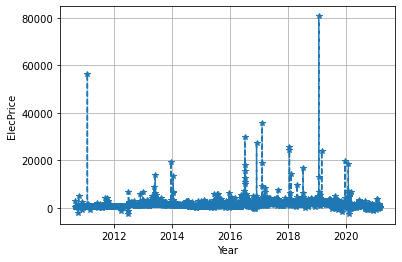

In [30]:
#Downsample to DAILY data points
df_daily = df.resample('D').sum()
plt.plot(df_daily.index, df_daily.y, '--' , marker= '*' )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'ElecPrice' )

In [31]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily[ 'add2' ]) 
print('ADfuller Stats for SysLoad')
print( f'ADF Statistic: {adf_result[ 0 ]} ' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

ADfuller Stats for SysLoad
ADF Statistic: -3.6901589888366493 
p-value: 0.004253725504574063 
No. of lags used: 30 
No. of observations used : 3803 
Critical Values:
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 


In [32]:
adf_result = adfuller(df_daily[ 'add3' ]) 
print('ADfuller Stats for GasPrice')
print( f'ADF Statistic: {adf_result[ 0 ]} ' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

ADfuller Stats for GasPrice
ADF Statistic: -2.902766697165176 
p-value: 0.04502721288462584 
No. of lags used: 27 
No. of observations used : 3806 
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [33]:
adf_result = adfuller(df_daily[ 'y' ]) 
print('ADfuller Stats for ElecPrice')
print( f'ADF Statistic: {adf_result[ 0 ]} ' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

ADfuller Stats for ElecPrice
ADF Statistic: -8.269053866873824 
p-value: 4.848817773711018e-13 
No. of lags used: 20 
No. of observations used : 3813 
Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [34]:
df_daily

,add1,add2,add3,y
ds,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [35]:
print(df.head(2))
print(df_daily.head(2))

                     add1      add2  add3       y
ds                                               
2010-09-01 00:00:00  15.8  1688.215  3.69  23.710
2010-09-01 01:00:00  15.8  1669.195  3.69  22.635
             add1      add2   add3        y
ds                                         
2010-09-01  379.2  41565.38  88.56  2751.70
2010-09-02  369.6  38898.99  88.56   570.81


In [36]:
df_daily.reset_index(inplace=True)

df_daily

,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [37]:
train_data = df_daily[0:2757]
train_data

,ds,add1,add2,add3,y
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
2752,2018-03-15,609.6,27139.02585,220.6272,2717.340
2753,2018-03-16,648.0,19710.46400,216.9600,2277.335
2754,2018-03-17,724.8,1079.34705,209.0400,1718.385
2755,2018-03-18,508.8,-4102.43795,203.9880,1088.015


In [38]:
test_data = df_daily.loc[::-1].reset_index(drop=True)
test_data = test_data[0:2757]
test_data

,ds,add1,add2,add3,y
0,2021-02-28,583.2,6675.05485,131.6352,-98.985
1,2021-02-27,564.0,4932.88015,130.0800,488.980
2,2021-02-26,547.2,9517.02430,130.1808,1445.495
3,2021-02-25,518.4,4539.07855,130.5048,577.515
4,2021-02-24,537.6,-1525.49745,134.4000,634.770
...,...,...,...,...,...
2752,2013-08-17,384.0,8133.41615,121.3200,1320.565
2753,2013-08-16,424.8,10956.39035,139.2000,1707.565
2754,2013-08-15,422.4,24978.42980,121.3200,2713.205
2755,2013-08-14,355.2,12324.79960,121.3200,1460.680


In [39]:
ds_test = test_data[['ds','add1','add2','add3']]
y_test = test_data['y']

In [40]:

y_test

0        -98.985
1        488.980
2       1445.495
3        577.515
4        634.770
          ...   
2752    1320.565
2753    1707.565
2754    2713.205
2755    1460.680
2756    1518.215
Name: y, Length: 2757, dtype: float64

In [41]:
ds_test

,ds,add1,add2,add3
0,2021-02-28,583.2,6675.05485,131.6352
1,2021-02-27,564.0,4932.88015,130.0800
2,2021-02-26,547.2,9517.02430,130.1808
3,2021-02-25,518.4,4539.07855,130.5048
4,2021-02-24,537.6,-1525.49745,134.4000
...,...,...,...,...
2752,2013-08-17,384.0,8133.41615,121.3200
2753,2013-08-16,424.8,10956.39035,139.2000
2754,2013-08-15,422.4,24978.42980,121.3200
2755,2013-08-14,355.2,12324.79960,121.3200


In [42]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.fit(train_data)

17:18:56 - cmdstanpy - INFO - Chain [1] start processing
17:18:57 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
forecast = model.predict(ds_test)
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2013-08-13,858.165497,-1458.711592,3151.370815,1880.297860,1880.297860,1880.297860
1,2013-08-14,1043.113879,-1223.939343,3437.651044,1880.700789,1880.700789,1880.700789
2,2013-08-15,1880.079709,-218.841771,4095.216285,1881.103718,1881.103718,1881.103718
3,2013-08-16,1193.395492,-1057.222575,3399.939005,1881.506647,1881.506647,1881.506647
4,2013-08-17,724.743182,-1286.638960,2873.753797,1881.909576,1881.909576,1881.909576
...,...,...,...,...,...,...,...
2752,2021-02-24,973.930523,-1308.975994,3179.175663,2621.878134,1831.545939,3434.191373
2753,2021-02-25,1333.491536,-829.046845,3660.641124,2622.578471,1832.345020,3435.782349
2754,2021-02-26,1397.281496,-804.945402,3682.966175,2623.278808,1832.166656,3437.465338
2755,2021-02-27,1052.157406,-1188.713159,3429.015128,2623.979145,1831.935633,3439.437936


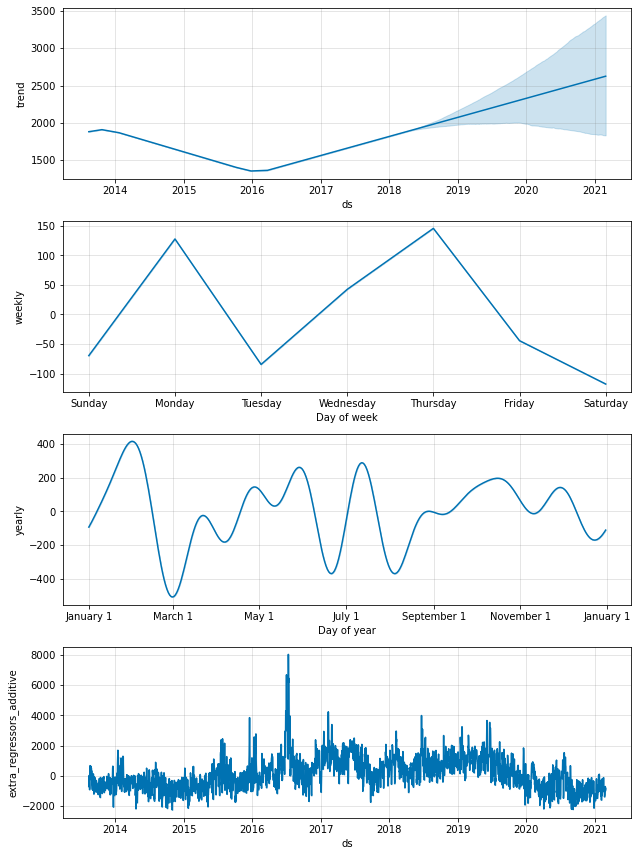

In [44]:
model.plot_components(forecast)
plt.show()

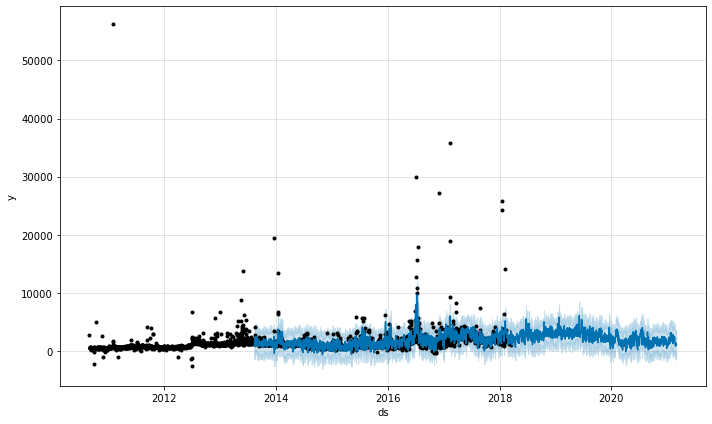

In [45]:
model.plot(forecast) 
plt.show()

In [46]:
pred = forecast['yhat']
pred = pd.DataFrame(pred)
pred

,yhat
0,858.165497
1,1043.113879
2,1880.079709
3,1193.395492
4,724.743182
...,...
2752,973.930523
2753,1333.491536
2754,1397.281496
2755,1052.157406


In [47]:
y_test = y_test.loc[::-1].reset_index(drop=True)
y_test = pd.DataFrame(y_test)
y_test

,y
0,1518.215
1,1460.680
2,2713.205
3,1707.565
4,1320.565
...,...
2752,634.770
2753,577.515
2754,1445.495
2755,488.980


In [48]:
result_df = pd.concat([y_test,pred],axis=1)
result_df

,y,yhat
0,1518.215,858.165497
1,1460.680,1043.113879
2,2713.205,1880.079709
3,1707.565,1193.395492
4,1320.565,724.743182
...,...,...
2752,634.770,973.930523
2753,577.515,1333.491536
2754,1445.495,1397.281496
2755,488.980,1052.157406


In [49]:
mean_absolute_error(y_test,pred)

770.7186064409358

In [50]:
np.sqrt(mean_squared_error(y_test,pred))

2142.0144022712648

In [51]:
mean_absolute_percentage_error(y_test, pred)

1.2166833297669577